Error Percentage: 71.50%

Incorrect Predictions:
Actual: PARENTING, Predicted: WELLNESS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: POLITICS, Predicted: FOOD & DRINK
Actual: POLITICS, Predicted: ENTERTAINMENT
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: POLITICS, Predicted: ENTERTAINMENT
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: POLITICS, Predicted: ENTERTAINMENT
Actual: POLITICS, Predicted: ENTERTAINMENT
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: ENTERTAINMENT, Predicted: POLITICS
Actual: EN

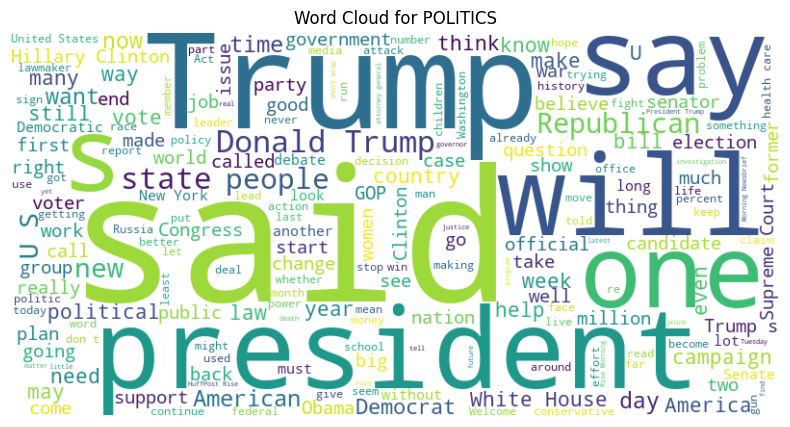

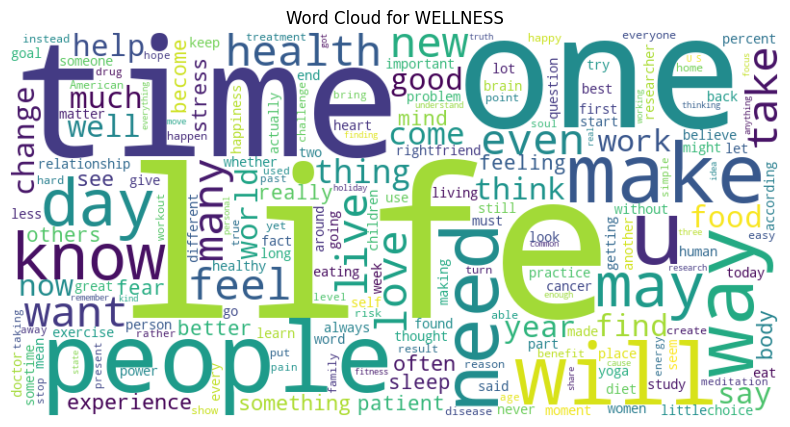

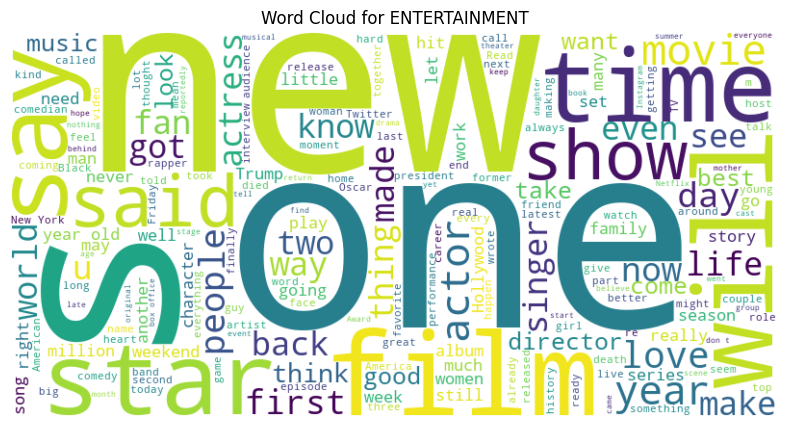

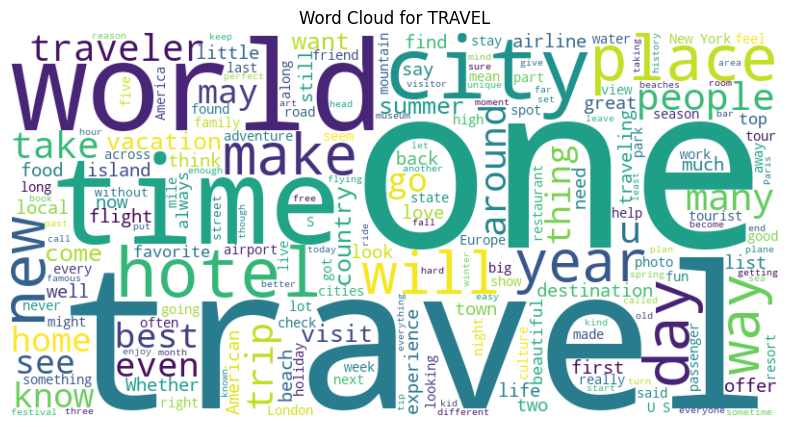

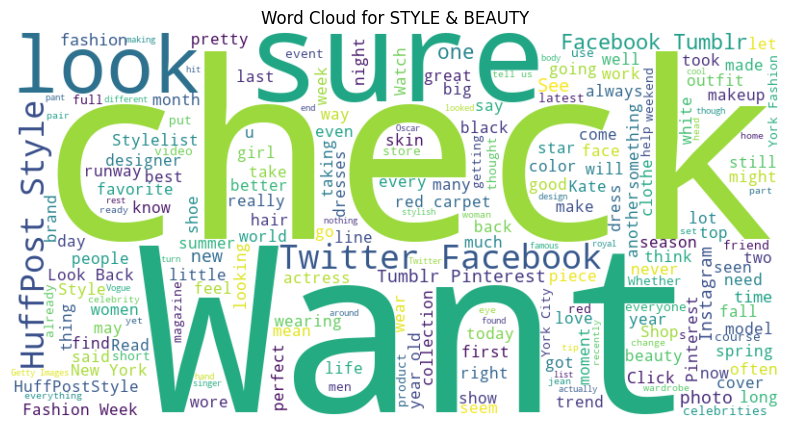

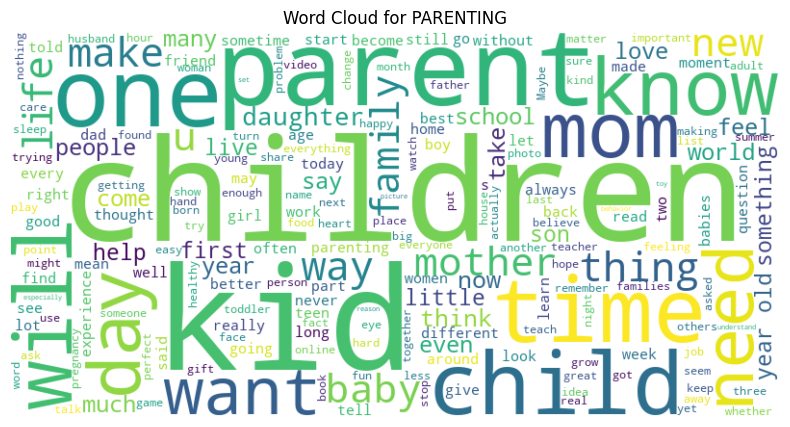

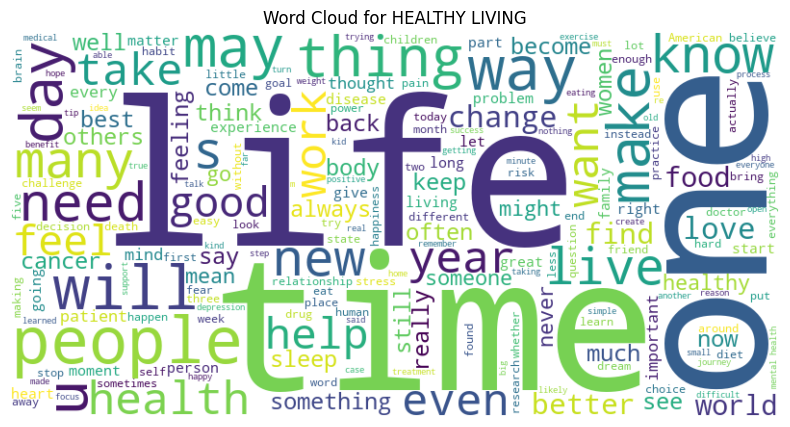

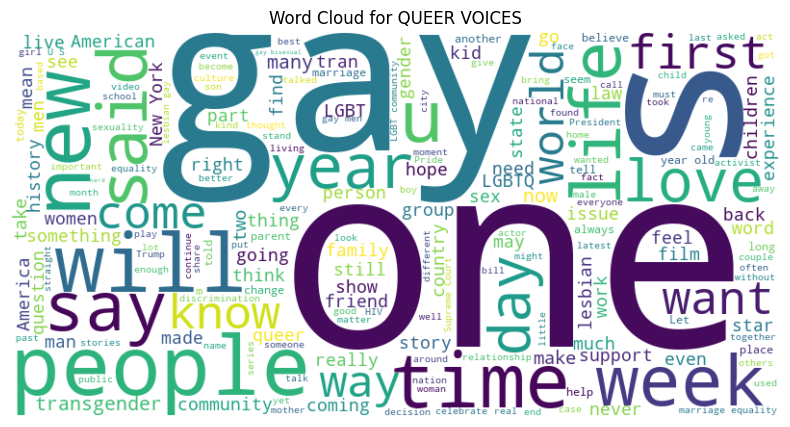

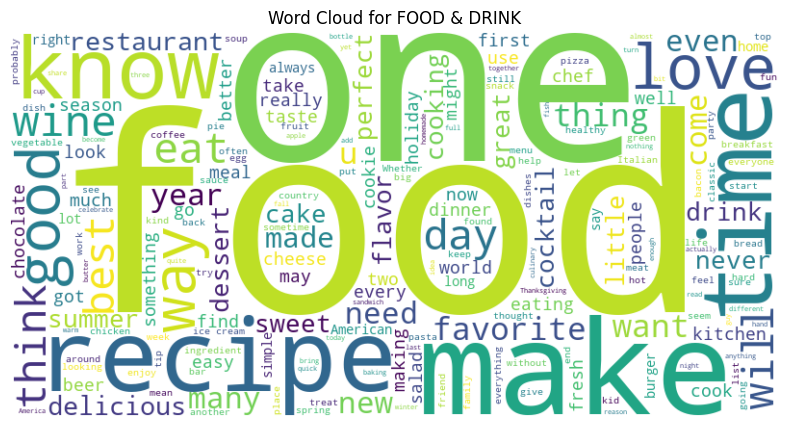

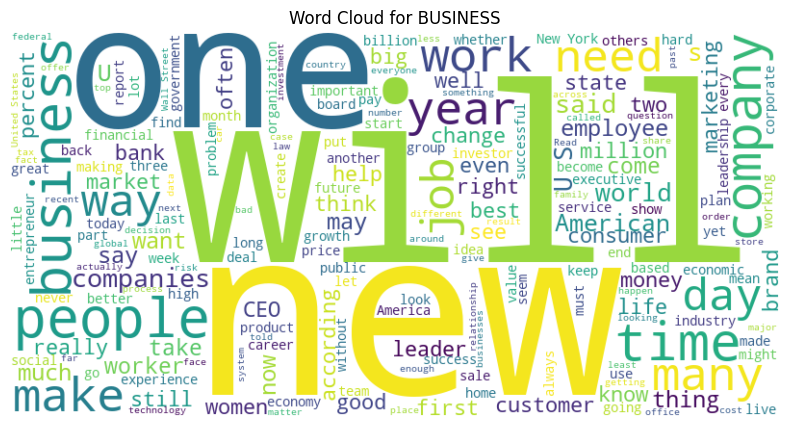

In [1]:
import pandas as pd
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Read the JSON file
file_path = 'News_Category_Dataset_v3.json'

# Load JSON data into a DataFrame
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)

# Step 2: Create a Top 10 Class
top_categories = df['category'].value_counts().head(10).index.tolist()
top_df = df[df['category'].isin(top_categories)]

# Step 3: Create a Dictionary for Each Class
class_keywords = {}
for category in top_categories:
    category_text = " ".join(top_df[top_df['category'] == category]['short_description'])
    words = category_text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(10)
    class_keywords[category] = [word for word, count in common_words]

# Function to count words from the dictionary
def count_words(description, keywords):
    words = description.split()
    return sum(1 for word in words if word in keywords)

# Step 4: Predict Category for Each Document and Calculate Error Rate
predictions = []
for index, row in top_df.iterrows():
    description = row['short_description']
    actual_category = row['category']
    category_scores = {category: count_words(description, keywords) for category, keywords in class_keywords.items()}
    predicted_category = max(category_scores, key=category_scores.get)
    predictions.append((actual_category, predicted_category))

# Calculate error rate
errors = sum(1 for actual, predicted in predictions if actual != predicted)
total_predictions = len(predictions)
error_percentage = (errors / total_predictions) * 100

print(f"Error Percentage: {error_percentage:.2f}%")

# Display incorrect predictions
incorrect_predictions = [(actual, predicted) for actual, predicted in predictions if actual != predicted]

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

# Step 5: Generate Word Clouds for each of the top categories
for category in top_categories:
    category_text = " ".join(top_df[top_df['category'] == category]['short_description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset from the JSON file
news_data = pd.read_json('News_Category_Dataset_v3.json', lines=True)

# Combine headline and short description for each article to form the search text
news_data['search_text'] = news_data['headline'] + " " + news_data['short_description']

# Initialize the TF-IDF Vectorizer and fit it to the dataset (if not already done)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(news_data['search_text'])

def search_articles(query, top_n=5):
    """
    Search for articles using the provided query and return the top_n most relevant articles.

    Parameters:
    query (str): The search query (keywords).
    top_n (int): The number of top relevant articles to return.

    Returns:
    DataFrame: A DataFrame containing the top_n relevant articles with their headlines and links.
    """
    # Transform the query using the same TF-IDF vectorizer
    query_tfidf = tfidf_vectorizer.transform([query])
    
    # Compute the cosine similarity between the query and the TF-IDF matrix
    cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
    
    # Get the indices of the top_n most similar articles
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    # Return the most relevant articles
    return news_data.loc[top_indices, ['headline', 'link']]

# Prompt the user for a search query
user_query = input("Enter your search query: ")

# Search for articles using the user-provided query
search_results = search_articles(user_query)

# Display the search results using print
search_results


headline  \
34296                            The Four Faces Of Trump   
65623                  Just One Day Without Trump's Name   
66263                        You Can Be Donald Trump too   
53229                                   Trump's Collapse   
19565  Jimmy Fallon And Martin Short Give Classic Chr...   

                                                    link  
34296  https://www.huffingtonpost.com/entry/the-four-...  
65623  https://www.huffingtonpost.com/entry/just-one-...  
66263  https://www.huffingtonpost.com/entry/you-can-b...  
53229  https://www.huffingtonpost.com/entry/trumps-co...  
19565  https://www.huffingtonpost.com/entry/jimmy-fal...